import os
    
os.getcwd()

In [35]:
# Importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score



# Loading the data

In [36]:
DF_Main=pd.read_excel('C:/Users/E100579/Desktop/case_study.xlsx')

In [37]:
DF=DF_Main.copy()

In [38]:
DF_Main

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,18,A32,A42,2604,A61,A74,5,A92,A101,...,A121,47,A143,A152,2,A172,2,A191,A201,1
996,A11,45,A32,A41,5786,A61,A73,6,A91,A101,...,A122,60,A143,A152,2,A174,2,A192,A201,1
997,A14,18,A32,A43,1206,A61,A75,6,A93,A101,...,A123,57,A143,A152,2,A173,2,A191,A201,1
998,A11,68,A32,A43,2768,A61,A73,6,A93,A101,...,A124,35,A143,A153,2,A173,2,A192,A201,2


# Descriptive statistics

In [39]:
DF.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [40]:
DF.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

# missing values

In [90]:

missing_values=[x for x in DF.columns if DF[x].isnull().sum()/len(DF)>0.3]
missing_values

[]

In [88]:
DF.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

# Finding Numeric and Categorial features 

In [122]:
# list of numerical variables
numerical_features = [feature for feature in DF_Main.columns if DF_Main[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
DF_Main[numerical_features].head()
DF_NM=DF[numerical_features]
numerical_features

Number of numerical variables:  8


['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'dependents',
 'status']

In [43]:
# list of Categorial variables
cat_features = [feature for feature in DF_Main.columns if DF_Main[feature].dtypes == 'O']

print('Number of categorial variables: ', len(cat_features))

# visualise the categorial variables
DF_Main[cat_features].head()

Number of categorial variables:  13


,checkin_acc,credit_history,purpose,svaing_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [44]:
# description of categorial features
for feature in cat_features:
    print('[{}] [{}] {}'.format(feature,len(DF_Main[feature].unique()),(DF_Main[feature].unique())))

[checkin_acc] [4] ['A11' 'A12' 'A14' 'A13']
[credit_history] [5] ['A34' 'A32' 'A33' 'A30' 'A31']
[purpose] [10] ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
[svaing_acc] [5] ['A65' 'A61' 'A63' 'A64' 'A62']
[present_emp_since] [5] ['A75' 'A73' 'A74' 'A71' 'A72']
[personal_status] [4] ['A93' 'A92' 'A91' 'A94']
[other_debtors] [3] ['A101' 'A103' 'A102']
[property] [4] ['A121' 'A122' 'A124' 'A123']
[inst_plans] [3] ['A143' 'A141' 'A142']
[housing] [3] ['A152' 'A153' 'A151']
[job] [4] ['A173' 'A172' 'A174' 'A171']
[telephone] [2] ['A192' 'A191']
[foreign_worker] [2] ['A201' 'A202']


# EDA

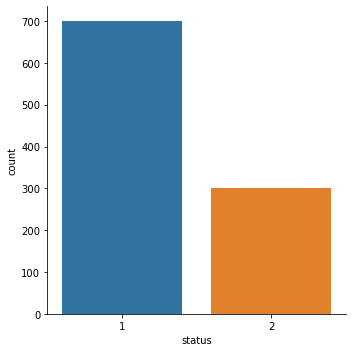

In [45]:
# Checking the distribution of Dependent Class
sns.catplot(x='status', data = DF, kind = 'count')

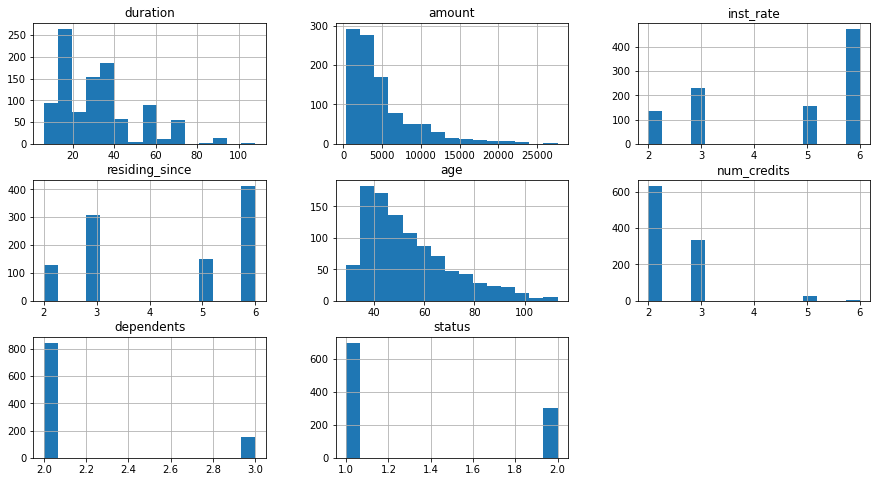

In [121]:

DF_Main.hist(figsize=(15,8),bins = 15)
plt.title("Features Distribution")
plt.show()

# Check how differnt numerical features are realated to Dependendent variable(STATUS)

In [47]:
import math

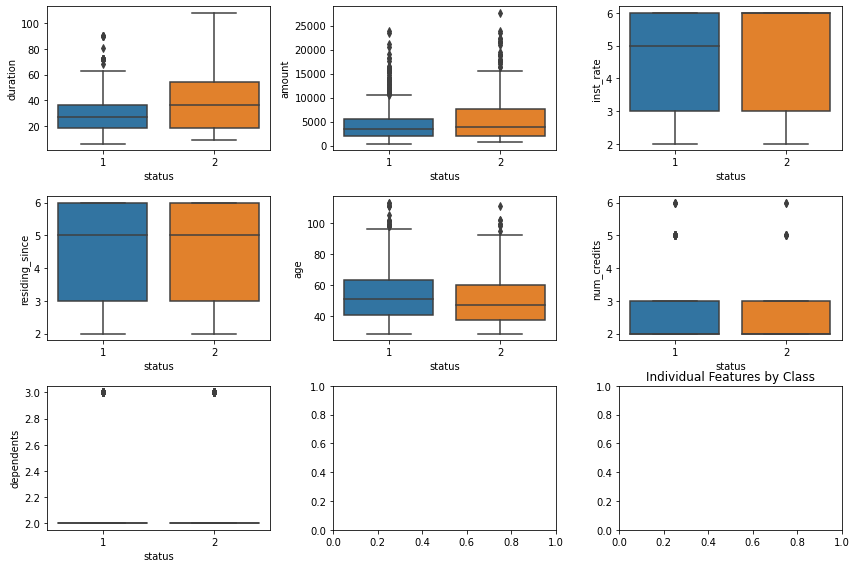

In [48]:
# Number of rows and columns in the plot
numerical_features.remove('status')
n_cols = 3
n_rows = math.ceil(len(numerical_features)/n_cols)
# Check the distribution of y variable corresponding to every x variable 
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(12,8))
row = 0
col = 0
for i in numerical_features:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = DF['status'], y = DF[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

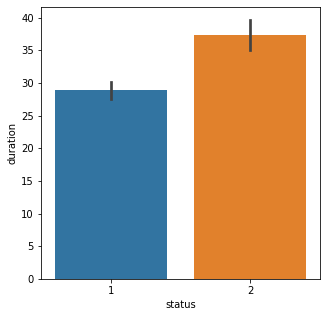

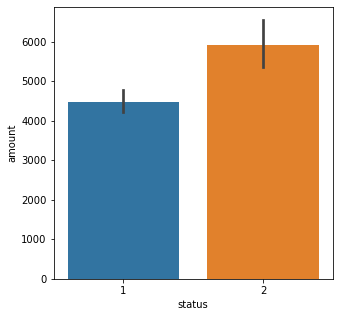

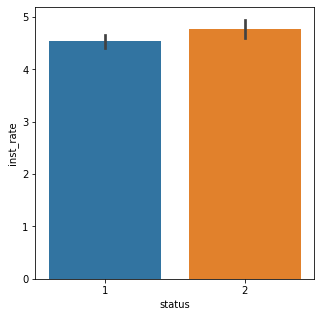

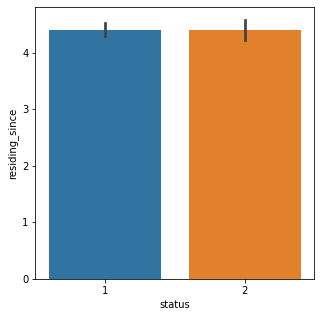

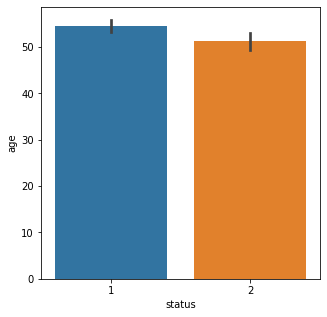

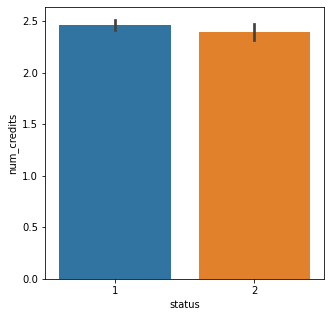

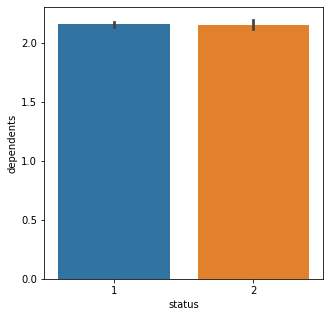

In [49]:
for feature in numerical_features:
    plot = plt.figure(figsize=(5,5))
    sns.barplot(x='status', y = feature, data = DF)

# Encoding the categorial features

In [50]:
for feature in cat_features:
    oe = LabelEncoder()
    DF[feature] = oe.fit_transform(DF[feature])

In [51]:
correlation = DF.corr()

<AxesSubplot:>

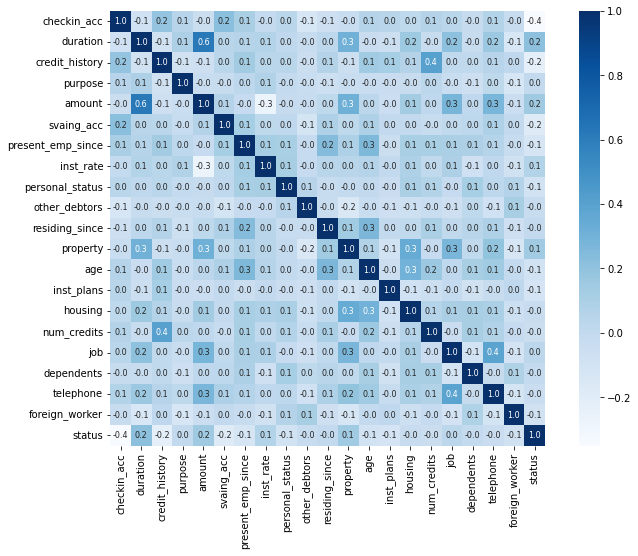

In [123]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(12,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

# DATA PREPROCESSING

In [53]:
# separate the data and Label
X = DF.drop('status',axis=1)
Y=DF['status']

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(Y.shape, Y_train.shape, Y_test.shape)

(1000,) (800,) (200,)


# Feature selection

In [56]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.05670406, 0.03738093, 0.02766961, 0.01937102, 0.03749226,
       0.02934752, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03444411, 0.00480666, 0.01309836, 0.        ,
       0.00679553, 0.        , 0.        , 0.02602283, 0.        ])

In [57]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

checkin_acc          0.056704
amount               0.037492
duration             0.037381
property             0.034444
svaing_acc           0.029348
credit_history       0.027670
telephone            0.026023
purpose              0.019371
inst_plans           0.013098
num_credits          0.006796
age                  0.004807
housing              0.000000
dependents           0.000000
job                  0.000000
residing_since       0.000000
other_debtors        0.000000
personal_status      0.000000
inst_rate            0.000000
present_emp_since    0.000000
foreign_worker       0.000000
dtype: float64

<AxesSubplot:>

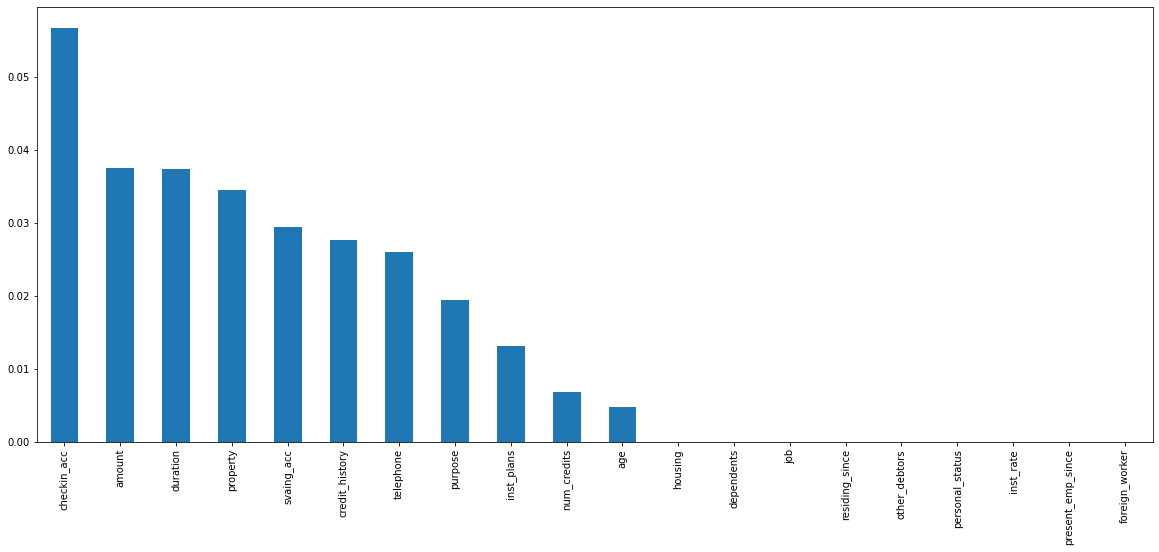

In [58]:
 #let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [59]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 12 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k=14)
sel_ten_cols.fit(X_train, Y_train)
X_train.columns[sel_ten_cols.get_support()]

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'personal_status', 'other_debtors',
       'residing_since', 'property', 'housing', 'telephone', 'foreign_worker'],
      dtype='object')

In [60]:
X_new =DF[X_train.columns[sel_ten_cols.get_support()]]


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.5, random_state=0)

# Model Selection

  model= RandomForestClassifier()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    # recall score 
    training_data_recall = recall_score(Y_train, X_train_prediction)
    test_data_recall = recall_score(Y_test, X_test_prediction)
    
    print('Accuracy and recall scores  of training data of model are : ',model , training_data_accuracy , training_data_recall)
    print('Accuracy and recall scores of model are : ',model, test_data_accuracy,test_data_recall)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))

model= LogisticRegression()
model.fit(X_train, Y_train)
#accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
#recall score 
training_data_recall = recall_score(Y_train, X_train_prediction)
test_data_recall = recall_score(Y_test, X_test_prediction)

print('Accuracy and recall scores  of training data of model are : ',model , training_data_accuracy , training_data_recall)
print('Accuracy and recall scores of model are : ',model, test_data_accuracy,test_data_recall)
print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))

model= GaussianNB()
model.fit(X_train, Y_train)
 accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
#recall score 
training_data_recall = recall_score(Y_train, X_train_prediction)
test_data_recall = recall_score(Y_test, X_test_prediction)

model= SVC(kernel='linear')
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    # recall score 
    training_data_recall = recall_score(Y_train, X_train_prediction)
    test_data_recall = recall_score(Y_test, X_test_prediction)
    
    print('Accuracy and recall scores  of training data of model are : ',model , training_data_accuracy , training_data_recall)
    print('Accuracy and recall scores of model are : ',model, test_data_accuracy,test_data_recall)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))

    model= AdaBoostClassifier()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    # recall score 
    training_data_recall = recall_score(Y_train, X_train_prediction)
    test_data_recall = recall_score(Y_test, X_test_prediction)
    
    print('Accuracy and recall scores  of training data of model are : ',model , training_data_accuracy , training_data_recall)
    print('Accuracy and recall scores of model are : ',model, test_data_accuracy,test_data_recall)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))

In [62]:
# selected model -  Grdaient Boosting

In [124]:
    model= GradientBoostingClassifier()
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    # recall score 
    training_data_recall = recall_score(Y_train, X_train_prediction)
    test_data_recall = recall_score(Y_test, X_test_prediction)
    
    print('Accuracy and recall scores  of training data of model are : ',model , training_data_accuracy , training_data_recall)
    print('Accuracy and recall scores of model are : ',model, test_data_accuracy,test_data_recall)
    print('confusion matix of model  : ',model, confusion_matrix(Y_test,X_test_prediction ))

Accuracy and recall scores  of training data of model are :  GradientBoostingClassifier() 0.922 0.9857142857142858
Accuracy and recall scores of model are :  GradientBoostingClassifier() 0.778 0.9028571428571428
confusion matix of model  :  GradientBoostingClassifier() [[316  34]
 [ 77  73]]


# Hyperparameytric tuning using GridsearchCV

In [66]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

In [67]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=10)
cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [68]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [69]:
 display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}


0.7 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.7 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.72 + or -0.027 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.728 + or -0.034 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.7 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.706 + or -0.013 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.736 + or -0.025 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.756 + or -0.038 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.7 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.706 + or -0.028 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.762 + or -0.046 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_esti

In [125]:
    model= GradientBoostingClassifier(learning_rate= 0.1,max_depth= 1,n_estimators=250)
    model.fit(X_train, Y_train)
    # accuracy score on training data
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # accuracy on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    # ON Whole Data
    Y_Pred = model.predict(X_new)
    Data_accuracy=accuracy_score(Y_Pred, Y)
    # recall score 
    data_recall = recall_score(Y,Y_Pred )
    test_data_recall = recall_score(Y_test, X_test_prediction)
    
    print('Accuracy and recall scores  data of model are : ',model ,Data_accuracy, data_recall)
    print('Accuracy and recall scores of test data are : ',model, test_data_accuracy,test_data_recall)
    print('confusion matix of model  : ',model, confusion_matrix(Y_Pred,Y))

Accuracy and recall scores  data of model are :  GradientBoostingClassifier(max_depth=1, n_estimators=250) 0.792 0.92
Accuracy and recall scores of test data are :  GradientBoostingClassifier(max_depth=1, n_estimators=250) 0.766 0.9
confusion matix of model  :  GradientBoostingClassifier(max_depth=1, n_estimators=250) [[644 152]
 [ 56 148]]


In [126]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
print(classification_report(Y_train,X_train_prediction))
print(classification_report(Y_test, X_test_prediction))
print(classification_report(Y_Pred,Y))

              precision    recall  f1-score   support

           1       0.82      0.94      0.88       350
           2       0.79      0.53      0.64       150

    accuracy                           0.82       500
   macro avg       0.81      0.74      0.76       500
weighted avg       0.81      0.82      0.81       500

              precision    recall  f1-score   support

           1       0.79      0.90      0.84       350
           2       0.66      0.45      0.54       150

    accuracy                           0.77       500
   macro avg       0.73      0.68      0.69       500
weighted avg       0.75      0.77      0.75       500

              precision    recall  f1-score   support

           1       0.92      0.81      0.86       796
           2       0.49      0.73      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.77      0.72      1000
weighted avg       0.83      0.79      0.81      1000



In [146]:
input_data=(1,55000,3,40,70000000,60,7,8,9,1,11,1,13,1)

In [147]:
def reshaped(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    return input_data_reshaped

In [148]:
prediction = model.predict(reshaped(input_data))
print(prediction)
if (prediction[0]==2):
  print('Person is going to be defaulter')
else:
  print('Not defaulter')

[2]
Person is going to be defaulter
